# Importing Data

In [3]:
import pandas as pd

In [4]:
A = pd.read_csv("C:/Users/akaks/Downloads/AAPL.csv",index_col='date',parse_dates=True)

In [5]:
A = A['close']

In [50]:
A

date
2015-05-27 00:00:00+00:00    132.045
2015-05-28 00:00:00+00:00    131.780
2015-05-29 00:00:00+00:00    130.280
2015-06-01 00:00:00+00:00    130.535
2015-06-02 00:00:00+00:00    129.960
                              ...   
2020-05-18 00:00:00+00:00    314.960
2020-05-19 00:00:00+00:00    313.140
2020-05-20 00:00:00+00:00    319.230
2020-05-21 00:00:00+00:00    316.850
2020-05-22 00:00:00+00:00    318.890
Name: close, Length: 1258, dtype: float64

# Plotting the data

<AxesSubplot:xlabel='date'>

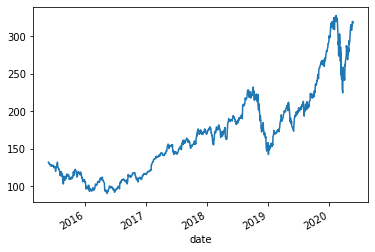

In [7]:
A.plot()

In [8]:
import numpy as np

# Standardization

In [9]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df1 = mm.fit_transform(np.array(A).reshape(-1,1))

In [10]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

# Defining training data and testing data

In [51]:
tr_size = int(len(df1)*0.65)
ts_size = len(df1)-tr_size

In [13]:
train_data = df1[:tr_size]
test_data = df1[tr_size:]

In [15]:
xtrain =[]
ytrain = []
for i in range(100,816):
    xtrain.append(train_data[i-100:i])
    ytrain.append(train_data[i:i+1])

In [17]:
ytrain = np.array(ytrain)

In [18]:
xtrain = np.array(xtrain)

In [19]:
xtest = []
ytest = []
for i in range(100,440):
    xtest.append(test_data[i-100:i])
    ytest.append(test_data[i:i+1])

In [20]:
ytest = np.array(ytest)

In [21]:
xtest = np.array(xtest)

# Creating Model

In [22]:
from keras.models import Sequential
from keras.layers import LSTM,Dense

In [23]:
nn = Sequential()
nn.add(LSTM(50,return_sequences=True,input_shape =(100,1)))
nn.add(LSTM(50,return_sequences=True))
nn.add(LSTM(50))
nn.add(Dense(1))

In [24]:
nn.compile(optimizer='adam',loss='mse')

# Training the model

In [25]:
nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50,batch_size=50)

Epoch 1/50
15/15 [==============================] - 20s 503ms/step - loss: 0.0131 - val_loss: 0.0521
Epoch 2/50
15/15 [==============================] - 4s 292ms/step - loss: 0.0020 - val_loss: 0.0112
Epoch 3/50
15/15 [==============================] - 5s 305ms/step - loss: 0.0010 - val_loss: 0.0054
Epoch 4/50
15/15 [==============================] - 4s 288ms/step - loss: 6.8726e-04 - val_loss: 0.0058
Epoch 5/50
15/15 [==============================] - 5s 304ms/step - loss: 6.4969e-04 - val_loss: 0.0035
Epoch 6/50
15/15 [==============================] - 5s 308ms/step - loss: 6.4100e-04 - val_loss: 0.0039
Epoch 7/50
15/15 [==============================] - 4s 278ms/step - loss: 6.1378e-04 - val_loss: 0.0048
Epoch 8/50
15/15 [==============================] - 4s 289ms/step - loss: 6.2890e-04 - val_loss: 0.0038
Epoch 9/50
15/15 [==============================] - 5s 307ms/step - loss: 5.8095e-04 - val_loss: 0.0033
Epoch 10/50
15/15 [==============================] - 5s 306ms/step - loss: 

In [26]:
loss_per_epoch = nn.history.history['loss']

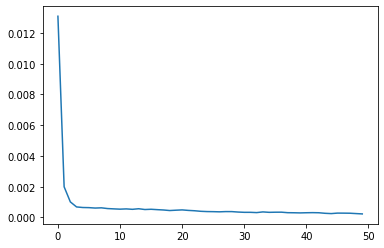

In [27]:
import matplotlib.pyplot as plt
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

# Making Predictions

In [28]:
pred_tr = nn.predict(xtrain)
pred_ts = nn.predict(xtest)
pred_tr = mm.inverse_transform(pred_tr)
pred_ts = mm.inverse_transform(pred_ts)

In [32]:
ytrain = ytrain.reshape(-1,1)

In [34]:
ytest = ytest.reshape(-1,1)

# Calculating Error

In [70]:
#Testing error

In [33]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ytrain,pred_tr))

141.3687719832232

In [69]:
#Training error

In [35]:
np.sqrt(mean_squared_error(ytest,pred_ts))

233.98113481052337

# Preparing data for testing set

In [36]:
test_data.shape

(441, 1)

In [37]:
x_input = test_data[341:].reshape(1,-1)

In [39]:
temp_input=list(x_input)[0].tolist()

In [40]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = nn.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = nn.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.90736955]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

In [44]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

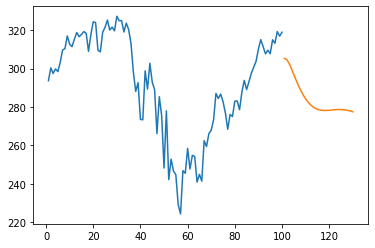

In [45]:
plt.plot(day_new,A[1158:])
plt.plot(day_pred,mm.inverse_transform(lst_output))

# Plotting the result

In [61]:
B = A.tolist()
B.extend(mm.inverse_transform(lst_output))

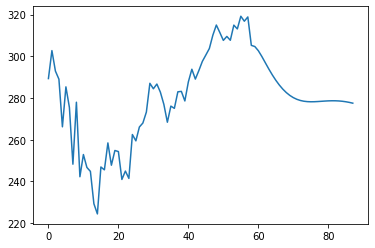

In [63]:
plt.plot(B[1200:])

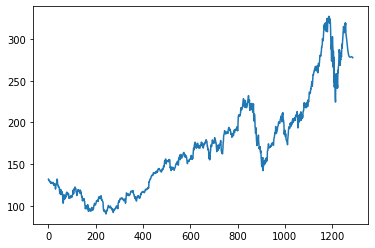

In [64]:
plt.plot(B)